In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
df.dtypes

town     object
area      int64
price     int64
dtype: object

In [5]:
dummies = pd.get_dummies(df.town).astype(int)

In [6]:
merge = pd.concat([df,dummies],axis =1)

In [7]:
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [8]:
final = merge.drop(['town','west windsor'],axis = 1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
X = final.drop('price',axis = 1)
X
Y = final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [11]:
model.fit(X,Y)

LinearRegression()

In [12]:
model.predict([[2800,0,1]])

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [13]:
model.predict([[3400,0,0]])

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [14]:
model.score(X,Y)

0.9573929037221873

# one Hot Encoding

In [16]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [19]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [20]:
Y = dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')


In [22]:
X = ct.fit_transform(X)
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [23]:
model.fit(X,Y)

LinearRegression()

In [24]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [25]:
model.predict([[0,1,3400]])

array([681241.6684584])

# Exercise

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


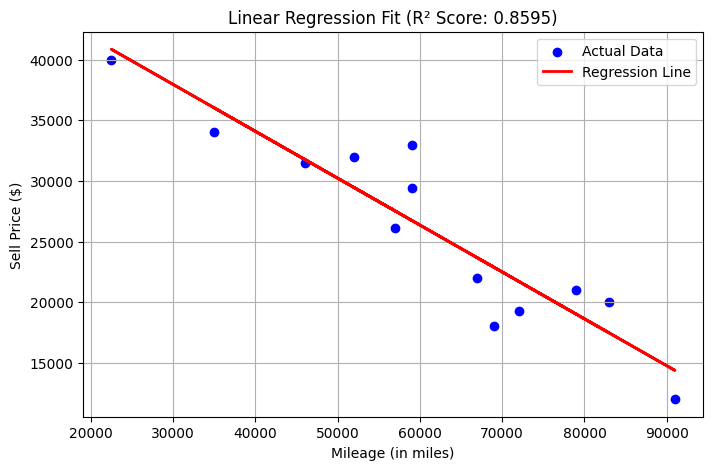

Intercept (b): 49571.04
Slope (m): -0.3868 → Price decreases by $0.39 per mile
R² Score: 0.8595


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


file_path = "carprices.csv"
df = pd.read_csv(file_path)

X = df[['Mileage']]
y = df['Sell Price($)']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', marker='o', label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")  

plt.xlabel("Mileage (in miles)")
plt.ylabel("Sell Price ($)")
plt.title(f"Linear Regression Fit (R² Score: {r2:.4f})")
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept (b): {model.intercept_:.2f}")
print(f"Slope (m): {model.coef_[0]:.4f} → Price decreases by ${abs(model.coef_[0]):.2f} per mile")
print(f"R² Score: {r2:.4f}")


In [59]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [61]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()

In [69]:
df['Car Model'] = le.fit_transform(df['Car Model'])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [75]:
X = df[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [79]:
Y = df['Sell Price($)'].values
Y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Car Model',OneHotEncoder(),[0])], remainder='passthrough')


In [85]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [91]:
X = X[:,1:]
X

array([[0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 9.10e+04, 8.00e+00],
       [1.00e+00, 6.70e+04, 6.00e+00],
       [1.00e+00, 8.30e+04, 7.00e+00],
       [1.00e+00, 7.90e+04, 7.00e+00],
       [1.00e+00, 5.90e+04, 5.00e+00]])

In [93]:
model.fit(X,Y)

LinearRegression()

In [107]:
model.score(X,Y)

0.9059850708891808

In [119]:
X

array([[0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 9.10e+04, 8.00e+00],
       [1.00e+00, 6.70e+04, 6.00e+00],
       [1.00e+00, 8.30e+04, 7.00e+00],
       [1.00e+00, 7.90e+04, 7.00e+00],
       [1.00e+00, 5.90e+04, 5.00e+00]])

In [113]:
model.predict([[0,45000,4]])

array([31590.32369932])

In [105]:
model.predict([[0,86000,7]])

array([14081.23606258])

In [121]:
# USing Fit 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [6]:
df1 = pd.get_dummies(df['Car Model']).astype(int)

In [8]:
df1

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [22]:
final = pd.concat([df,df1],axis = 'columns')
final

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [24]:
final = final.drop(['Car Model','Audi A5'],axis ='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [28]:
X = final.drop('Sell Price($)',axis = 1)
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [32]:
Y = final['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [36]:
model.score(X,Y)

0.9417050937281083

In [38]:
model.predict([[45000,4,0,1]])

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [40]:
model.predict([[86000,7,1,0]])

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])